<a href="https://colab.research.google.com/github/BadPrograms/Sanger-s-Optimized/blob/main/Sanger's_rule(General_Hebbian_Algorithm)true.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(1000)

# Create and scale dataset
X, _ = make_blobs(n_samples=10000, centers=2, cluster_std=1, random_state=1300)

In [2]:
#scaling of values ( X- mean(X))
scaler = StandardScaler(with_std=False)
Xs = scaler.fit_transform(X)

In [3]:
Q = np.cov(X.T)
eigu, eigv = np.linalg.eig(Q)
print(eigv)

[[-0.93357307 -0.35838712]
 [ 0.35838712 -0.93357307]]


In [13]:
#General Hebbian Algorithm function
def gha(X,pcs,learning_rate=0.01,iterations=4000):
    t=0
    W=np.random.normal(scale=0.1, size=(pcs, len(X[0,:])))
    #print(W)
    for _ in range(1,iterations):
      dw=np.zeros(W.shape)
      y=np.dot(W,X.T)
      h=np.dot(y,X)
      ah=np.tril(np.dot(y,y.T))
      #print(ah.shape)
      dw=learning_rate/((_)**2)*(h-np.dot(ah,W))
      W+=dw
      W /= np.linalg.norm(W,axis=1).reshape((len(W[:,1]),1))
    return W
 

In [14]:
#Xs

In [15]:
a=gha(Xs,2)


In [17]:
#print(a)
a3=np.flip(a,1)
print(a3)

[[-0.93357307 -0.35838712]
 [-0.36277285  0.9318776 ]]


In [10]:
import PIL as pil
from google.colab import files
import sys
import io
uploaded = files.upload()
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt



Saving blobs.png to blobs (2).png


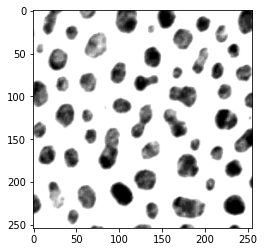

In [179]:
im = pil.Image.open(io.BytesIO(uploaded['blobs.png']))
#im.show()

plt.imshow(im)
plt.show()

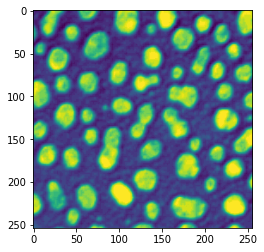

In [180]:
imarray = np. array(im)
plt.imshow(imarray)

In [181]:
#imarray = scaler.fit_transform(imarray)
#print(gha(imarray,5))




In [200]:
#selecting randomly subimages
def sub_images(im,leng=8,times=10000):
  ims=np.zeros((leng,leng,times))
  for _ in range(times):
    i= np.random.randint(len(im)-leng-1)
    j=np.random.randint(len(im)-leng-1)
    for o in range(leng):
      for p in range(leng):
        ims[o,p,_]=im[o+i,p+j]
  return ims

#function for image flattening row1->row2->row3...

def flatten_img(im,times=10000):
  
  vals=np.zeros((times))
  for _ in range(times):
    ar=[]
    for j in range(0,len(im)):
      for i in range(0,len(im)):
        ar.append(im[i,j])
    vals=np.vstack([vals,ar])
  return ar


In [ ]:
a=sub_images(imarray)
a=np.array(flatten_img(a))
print(a.shape)
a=a.T
a= scaler.fit_transform(a)
#a=a.T
print(a.shape)

In [184]:
wei=gha(a,10)
wei=np.flip(wei,1)

#print((wei.shape))

In [185]:
print(wei.shape)
print(wei[:,0])

(10, 64)
[-0.10272813 -0.21837129 -0.06087843 -0.30279309  0.06409134  0.12108174
 -0.02141768 -0.37518573  0.33224558 -0.00779653]


1000


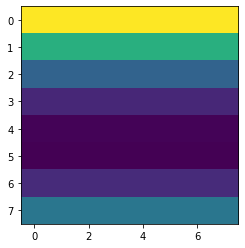

In [159]:
#coefficients algorithm
#to flattened filtro ka9e grammh
#oso pane oi grammes meiwnetai h shmantikothta
#plt.imshow(a)
def coef(ar,pca,weights,startingi=150,startingj=100):
  v=np.zeros((8,8,pca))
  #print(ar.shape)
  weights=weights.T
  for number in range(0,pca):
    for i in range(8):
      for j in range(8):
        for q in range(8):
          for p in range(8):
            v[i,j,number]+=weights[p+8*q,number]*ar[p+i+startingi,q+i+startingj]
          #number+=1
  return v
print(len(a))
coefs=coef(imarray,8,wei,26,49)
#coefs
plt.imshow(coefs[:,:,0])
#print(coefs)

In [189]:

def recon_im(weights,coefs,number=0):
  weights=weights.T
  rec_im=np.zeros((8,8))
  for i in range(8):
    for j in range(8):
      for p in range(8):
        for q in range(8):
          rec_im[i,j]+=weights[p+8*q,number]*coefs[i,j,number]
  return rec_im



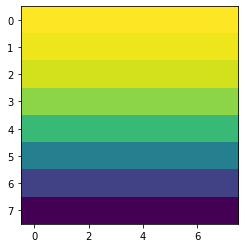

In [191]:
plt.imshow(recon_im(wei,coefs))

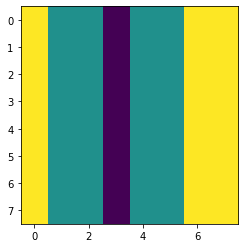

In [195]:
a=np.zeros((8,8))
for _ in range(8):
  a+=normalize(recon_im(wei,coefs,_))

plt.imshow(a.T)

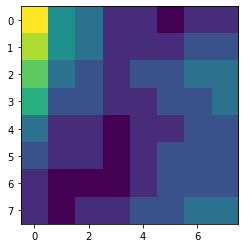

In [196]:
ims=np.zeros((8,8))
  
i= np.random.randint(len(imarray)-8-1)
j=np.random.randint(len(imarray)-8-1)
for o in range(8):
  for p in range(8):
      ims[o,p]=imarray[o+i,p+j]
plt.imshow(ims)

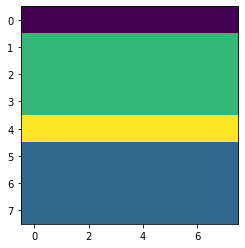

In [198]:
coefs=coef(imarray,10,wei,i,j)
a=np.zeros((8,8))
for _ in range(10):
  a+=normalize(recon_im(wei,coefs,_))

plt.imshow(a)

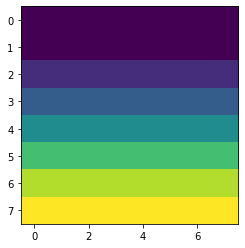

In [199]:
plt.imshow(recon_im(wei,coefs,0))